In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import ttest_ind

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Reading the dataset
path = os.path.join('c:' + os.sep, 'Users', 'Bryan', 'Downloads', 'visathon_train_data.csv', 'visathon_train_data.csv')
df = pd.read_csv(path)

In [3]:
#Obtain first five rows of dataset
df.head()

,customer_id,vintage,age,gender,dependents,occupation,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1.0,3135.0,66.0,Male,0.0,Engineer,Medium,755.0,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,NaN,1458.71,1458.71,Yes
1,6.0,2531.0,42.0,Male,2.0,Engineer,Low,388.0,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,No
2,7.0,263.0,42.0,Female,0.0,Engineer,Medium,1666.0,60.0,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,Yes
3,8.0,5922.0,72.0,Male,0.0,Lawyer,High,1.0,98.0,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,Yes
4,9.0,1145.0,46.0,Male,0.0,Engineer,Medium,317.0,172.0,10096.58,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,Yes


In [21]:
#Find the number of rows and columns
df.shape

(15180, 20)

In [5]:
#Find the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17654 entries, 0 to 17653
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     17654 non-null  float64
 1   vintage                         17654 non-null  float64
 2   age                             17654 non-null  float64
 3   gender                          17654 non-null  object 
 4   dependents                      17654 non-null  float64
 5   occupation                      17472 non-null  object 
 6   customer_nw_category            17654 non-null  object 
 7   branch_code                     17654 non-null  float64
 8   days_since_last_transaction     17654 non-null  float64
 9   current_balance                 16939 non-null  float64
 10  previous_month_end_balance      17654 non-null  float64
 11  average_monthly_balance_prevQ   17654 non-null  float64
 12  average_monthly_balance_prevQ2  

In [6]:
# Wrangling data type of churn from object to bool (0 or 1)
df['churn'] = (df['churn'] == 'Yes')

Finding the number of null values for each column

In [7]:
df.isnull().sum()

customer_id                         0
vintage                             0
age                                 0
gender                              0
dependents                          0
occupation                        182
customer_nw_category                0
branch_code                         0
days_since_last_transaction         0
current_balance                   715
previous_month_end_balance          0
average_monthly_balance_prevQ       0
average_monthly_balance_prevQ2      0
current_month_credit                0
previous_month_credit               0
current_month_debit                 0
previous_month_debit              887
current_month_balance             816
previous_month_balance              0
churn                               0
dtype: int64

In [8]:
#Drop null values
df.dropna(inplace=True, subset=["occupation",
                                "current_balance",
                                "previous_month_debit",
                                "current_month_balance"])

In [9]:
#Number of null values for each column
df.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

Descriptive statistics of the columns in the dataset

In [10]:
df.describe()

,customer_id,vintage,age,dependents,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
count,15180.000000,15180.000000,15180.000000,15180.000000,15180.000000,15180.000000,1.518000e+04,1.518000e+04,1.518000e+04,15180.000000,1.518000e+04,1.518000e+04,1.518000e+04,1.518000e+04,1.518000e+04,1.518000e+04
mean,12124.853426,2547.805270,47.965415,0.380764,876.209025,66.806456,7.170300e+03,7.296171e+03,7.234644e+03,6795.087669,3.499394e+03,3.843299e+03,3.834738e+03,3.784181e+03,7.257585e+03,7.228199e+03
std,6993.904354,1597.937559,16.453883,1.096479,904.536306,83.782354,2.105584e+04,2.195936e+04,1.903138e+04,18126.517751,2.923588e+04,3.470274e+04,2.730926e+04,2.567952e+04,2.043029e+04,2.090234e+04
min,6.000000,180.000000,1.000000,0.000000,1.000000,0.000000,-5.503960e+03,-3.145380e+03,1.428690e+03,-10691.930000,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03
25%,6073.000000,1320.000000,36.000000,0.000000,159.000000,11.000000,1.776133e+03,1.906840e+03,2.205740e+03,1819.310000,3.600000e-01,3.700000e-01,4.900000e-01,4.900000e-01,2.023968e+03,2.086240e+03
50%,12155.500000,2208.000000,46.000000,0.000000,533.000000,28.000000,3.321090e+03,3.415890e+03,3.582800e+03,3379.355000,1.105000e+00,7.410000e+00,2.203150e+02,2.302550e+02,3.505205e+03,3.489480e+03
75%,18176.250000,3374.000000,60.000000,0.000000,1375.000000,90.000000,6.801475e+03,6.881712e+03,6.860547e+03,6697.585000,9.946450e+02,1.156260e+03,1.601025e+03,1.688190e+03,6.878595e+03,6.813462e+03
max,24212.000000,11353.000000,90.000000,52.000000,4782.000000,365.000000,1.076091e+06,1.001124e+06,1.192704e+06,856596.510000,1.764286e+06,2.361808e+06,1.764286e+06,1.414168e+06,1.074625e+06,1.326487e+06


In [11]:
#Checking for duplicates in dataset
sum(df.duplicated(subset=['customer_id']))

0

This tells us that there are no duplicate customer_id.

<AxesSubplot:>

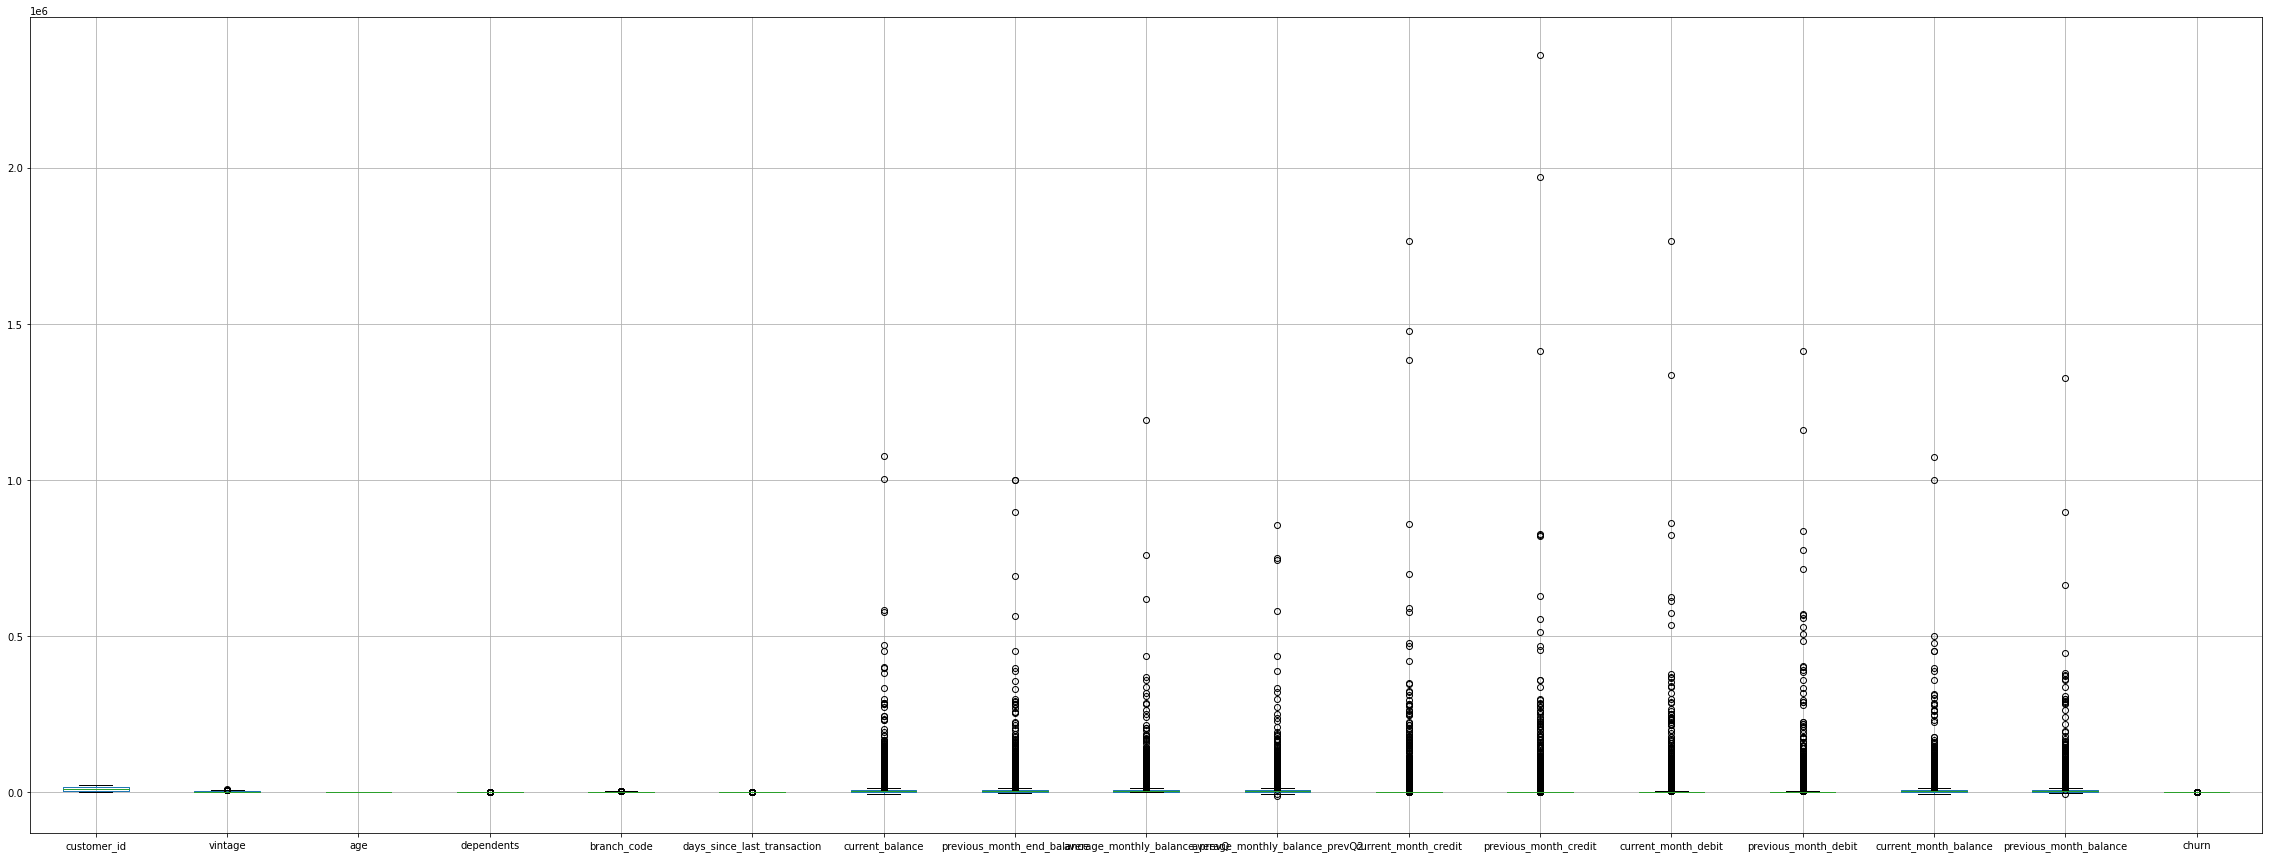

In [12]:
df.boxplot(figsize= (40,15))

Since there are a large number of outliers for all the columns of the dataset, we will not be removing outliers. 

# Data Visualisation

<AxesSubplot:>

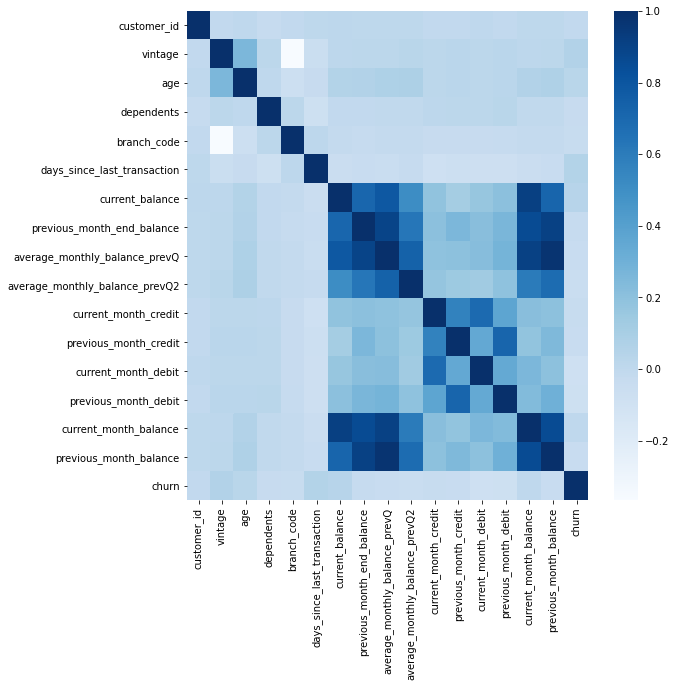

In [13]:
# Plot a heatmap between categorical values
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(), cmap='Blues')

There appears to be a correlation between days_since_last_correlation and churn. Hence, we would like to investigate the relationship between them.

## Hypothesis Testing

### μ1 = Sample mean of days_since_last_transaction of non-churned individuals
### μ2 = Sample mean of days_since_last_transaction of churned individuals
### The null hypothesis is H0: μ1-μ2 = 0
### Alternate Hypothesis H1: μ1-μ2 ≠ 0

In [14]:
#f2 is the churned individuals
df.sort_values('churn', ascending=False)
f1 = df[df['churn']]
f2 = f1['days_since_last_transaction']

#f4 is the non-churned individuals
f3 = df[-df['churn']]
f4 = f3['days_since_last_transaction']

In [15]:
ttest_ind(a=f2, b=f4, equal_var = False)

Ttest_indResult(statistic=7.974282564868873, pvalue=1.857745847680117e-15)

Since the p-value is 1.857745847680117e-15 < 0.05, this means that difference between the means of days_since_last_transaction is significant, and therefore the null hypothesis can be rejected.

Text(0, 0.5, 'Days Since Last Transaction')

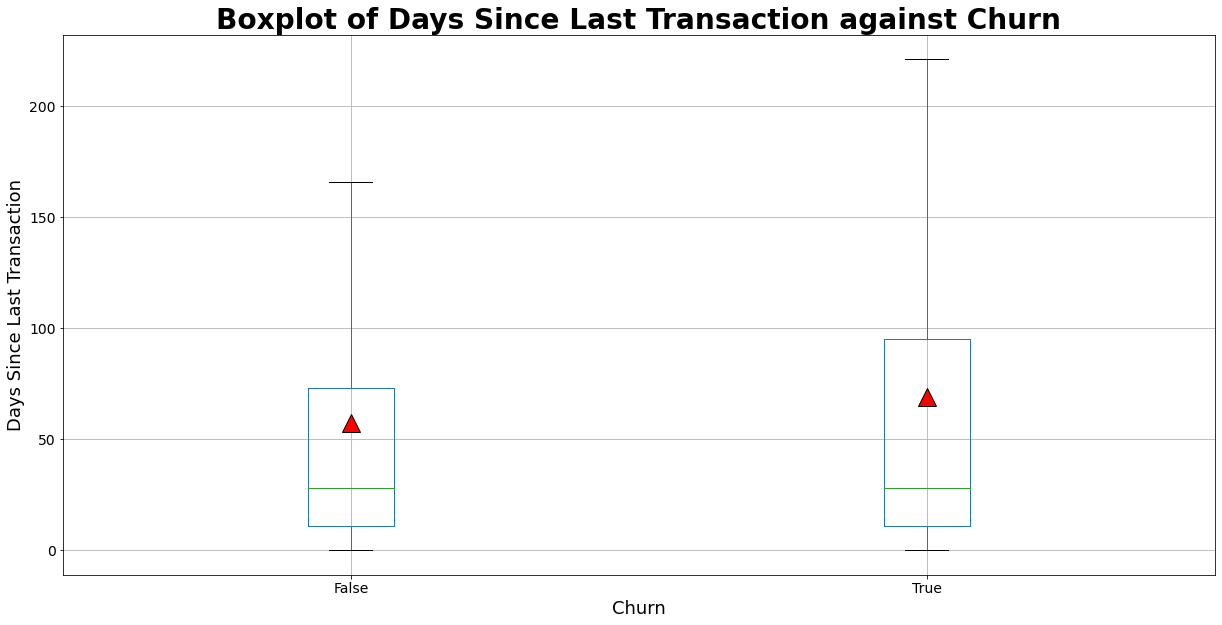

In [20]:
ax = df.boxplot(column = 'days_since_last_transaction', 
                by = 'churn', 
                figsize = (20,10), 
                showfliers=False, 
                fontsize = 14, 
                showmeans= True, 
                meanprops={"markerfacecolor":"red", "markeredgecolor":"black","markersize": "18"})
plt.suptitle('')
ax.set_title('Boxplot of Days Since Last Transaction against Churn', fontsize=28, fontweight='bold')
ax.set_xlabel('Churn', fontsize=18)
ax.set_ylabel('Days Since Last Transaction', fontsize=18)

As we can see from the boxplot, the mean of the individuals who churned is larger than that of those who did not churn. 
This could be due to the fact that people who churn are probably going to use the bank less often and have more days since last transaction 